# CSCA 5622 Intro to Machine Learning: Final Project

## Preschool Enrollment & Student Criminal Activity

This is a Supervised machine learning project for a Multi-class Classification task using Linear Regression to find the best features for predicting preschool enrollment.

Using public datasets from the Department of Education, find any correlations between states where children attended preschool, teacher certifications, and criminal offenses ocurring at school.


#### DATA INFO

**Teacher Credentials:**
- The `teacher_creds` data frame records number and percentage of public school classroom teachers (in full-time equivalents), by certification status and years of experience, by state: School Year 2013-14.

- Table reads (for US Totals): Of all 3,138,535 classroom teachers (FTE), 3,084,697 (98.3%) met all state licensing/certification requirements. Data reported in this table represent 100.0% of responding schools.

- *Source: U.S. Department of Education, Office for Civil Rights, Civil Rights Data Collection, 2013-14, available at http://ocrdata.ed.gov. Data notes are available at http://ocrdata.ed.gov/downloads/DataNotes.docx*
 
**Preschool Enrollment:**
- The `preschool` data frame records number and percentage of public school students enrolled in Preschool, by race/ethnicity, disability status, and English proficiency, by state: School Year 2015-16.

- Table reads (for US Totals): Of all 1,536,982 public school students enrolled in Preschool, 17,964 (1.2%) were American Indian or Alaska Native, and 313,601 (20.4%) were students with disabilities served under the Individuals with Disabilities Education Act (IDEA). Data reported in this table represent 100.0% of responding schools.																						
	
- *Source: U.S. Department of Education, Office for Civil Rights, Civil Rights Data Collection, 2015-16, available at http://ocrdata.ed.gov. Data notes are available at https://ocrdata.ed.gov/Downloads/Data-Notes-2015-16-CRDC.pdf*

**School Incidents:**
- The `incidents` data frame records number of incidents, by state: School Year 2015-16.

- Table reads (for US): The number of incidents of sexual assault was 9,255. Data reported in this table represent 98.0% of responding schools.

- *Source: U.S. Department of Education, Office for Civil Rights, Civil Rights Data Collection, 2015-16, available at http://ocrdata.ed.gov. Data notes are available at https://ocrdata.ed.gov/Downloads/Data-Notes-2015-16-CRDC.pdf.*																	

##### Disclaimers 
- Due to limited data available, the teacher credentials data is from school year 2013-2014 while the other two data sets are from 2015-2016.
- The school incidents data provides a disclaimer at the footer to "Interpret data in this row with caution. Data are missing for more than 15 percent of schools."
- This is only one school year's worth of data and would probably be more accurate with several years. 

**This results of this experiment will inherently be inacurrate so this should not be interpreted as factual.**


In [37]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from pathlib import Path

# Load & Prepare Data

In [38]:
BASE_PATH = Path.cwd().joinpath("../../data/")

## Load & Prepare Teacher Credentials Data
- Load the Excel sheet and exlcude the top few rows of formatting.
- Rename column names. See comments in the code for mappings.
- Remove the empty 0 index `NaN` column from Excel sheet.
- Drop the last few rows of metada and formatting. 

In [39]:
TEACHER_CREDENTIALS_COLUMN_MAPPINGS = [
    "C0",
    "state",
    # "Classroom Teachers (Full Time Equivelents)",
    "total_teachers",
    # "Meeting All State Licensing/Certification Requirements (Full Time Equivelents)",
    "requirements_met",
    # "Meeting All State Licensing/Certification Requirements (P)",
    "requirements_met_p",
    # "Classroom Teachers in their First Year of Teaching (Full Time Equivelents)",
    "first_year_teachers",
    # "Classroom Teachers in their First Year of Teaching (P)",
    "first_year_teachers_p",
    # "Classroom Teachers in their Second Year of Teaching (Full Time Equivelents)",
    "second_year_teachers",
    # "Classroom Teachers in their Second Year of Teaching (P)",
    "second_year_teachers_p",
    # Number of Schools
    "total_schools",
    # Number of schools percent
    "total_schools_p",
]

In [40]:
teacher_creds = pd.read_excel(
    BASE_PATH.joinpath("teacher-certification-and-years-of-experience.xlsx"),
    # -- Exclude the top rows of formatting
    skiprows=[0, 1, 2, 3, 4],
    names=TEACHER_CREDENTIALS_COLUMN_MAPPINGS,
)

# -- Remove unused rows and columns
teacher_creds.drop(["C0"], axis=1, inplace=True)
teacher_creds.drop([52, 53, 54, 55], inplace=True)

teacher_creds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   52 non-null     object 
 1   total_teachers          52 non-null     float64
 2   requirements_met        52 non-null     float64
 3   requirements_met_p      52 non-null     float64
 4   first_year_teachers     52 non-null     float64
 5   first_year_teachers_p   52 non-null     float64
 6   second_year_teachers    52 non-null     float64
 7   second_year_teachers_p  52 non-null     float64
 8   total_schools           52 non-null     float64
 9   total_schools_p         52 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.2+ KB


## Load & Prepare Preschool Data
- Load theExcel sheet and exlcude the top few rows of formatting.
- Rename column names. See comments in the code for mappings.
- Remove the empty 0 index `NaN` column from Excel sheet.
- Drop the last few rows of metada and formatting.

In [41]:
PRESCHOOL_ENROLLMENT_COLUMN_MAPPINGS = [
    "C0",
    "state",
    "total",
    "total_percent",
    # "American Indian or Alaska Native (N)",
    "american_indian_alaska_native",
    # "American Indian or Alaska Native (P)",
    "american_indian_alaska_native_p",
    "asian",
    "asian_p",
    # "Hispanic or Latino of any race (N)",
    "hispanic_latino_any",
    # "Hispanic or Latino of any race (P)",
    "hispanic_latino_any_p",
    # "Black or African American (N)"
    "black_african_american",
    # "Black or African American (P)"
    "black_african_american_p",
    "white",
    "white_p",
    # "Native Hawaiian or Other Pacific Islander (N)"
    "native_hawaiian_pacific_islander",
    # "Native Hawaiian or Other Pacific Islander (P)"
    "native_hawaiian_pacific_islander_p",
    # "Two or more races (N)",
    "mixed_race",
    # "Two or more races (P)",
    "mixed_race_p",
    # Students With Disabilities Served Under IDEA (N)
    "students_disabilities_idea",
    # Students With Disabilities Served Under IDEA (P)
    "students_disabilities_idea_p",
    # English Language Learners (N)
    "english_language_learners",
    # English Language Learners (P)
    "english_language_learners_p",
    # Number of Schools
    "total_schools",
    # Percent of Schools Reporting
    "total_schools_p",
]

In [42]:
preschool = pd.read_excel(
    BASE_PATH.joinpath(  "preschool-enrollment.xlsx",),
    # -- Exclude the top rows of formatting
    skiprows=[0, 1, 2, 3, 4],
    names=PRESCHOOL_ENROLLMENT_COLUMN_MAPPINGS,
)

# -- Remove unused rows and columns - school totals are redundant
preschool.drop(["C0", "total_schools", "total_schools_p"], axis=1, inplace=True)
preschool.drop([52, 53, 54, 55], inplace=True)

# -- Project all enrollments onto one column
cols_to_sum = preschool.columns[1:-2]
preschool["total_enrollments"] = preschool[cols_to_sum].sum(axis=1)

preschool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   state                               52 non-null     object 
 1   total                               52 non-null     float64
 2   total_percent                       52 non-null     float64
 3   american_indian_alaska_native       52 non-null     float64
 4   american_indian_alaska_native_p     52 non-null     float64
 5   asian                               52 non-null     float64
 6   asian_p                             52 non-null     float64
 7   hispanic_latino_any                 52 non-null     float64
 8   hispanic_latino_any_p               52 non-null     float64
 9   black_african_american              52 non-null     float64
 10  black_african_american_p            52 non-null     float64
 11  white                               52 non-null

/Users/seanbaier/Documents/projects/mscs/Courses/machine-learning/intro-machine-learning/csca5622-final-project/.venv/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Load & Prepare School Incident Data
- Load theExcel sheet and exlcude the top few rows of formatting.
- Rename column names. See comments in the code for mappings.
- Remove the empty 0 index `NaN` column from Excel sheet.
- Drop the last few rows of metada and formatting.

In [43]:
incident_col_mappings = [
    "C0",
    "state",
    # "Rape or attempted rape",
    "rape_atmp_rape",
    # "Sexual assault",
    "sex_aslt",
    # "Robbery with a weapon",
    "rob_weap",
    # "Robbery with a firearm or explosive",
    "rob_fire_expl",
    # "Robbery without a weapon",
    "rob",
    # "Physical attack or fight with a weapon",
    "phys_atk_fight_weap",
    # "Physical attack or fight with a firearm or explosive device",
    "phys_atk_fight_fire_expl",
    # "Physical attack without a weapon",
    "phys_atk",
    # "Threats of physical attack with a weapon",
    "threat_phys_atk_weap",
    # "Threats of physical attack with a firearm or explosive device",
    "threat_phys_atk_fire_expl",
    # "Threats of physical attack without a weapon",
    "threat_phys_atk",
    # "Possession of a firearm or explosive device",
    "poss_fire_expl",
    # Number of Schools
    "total_schools",
    # "Percent of Schools Reporting"
    "total_schools_p",
    "C16",
]

In [44]:
incidents = pd.read_excel(
    BASE_PATH.joinpath("offenses.xlsx"),
    # -- Exclude the top rows of formatting
    skiprows=[0, 1, 2, 3, 4],
    names=incident_col_mappings,
)

# -- Remove unused rows and columns - school totals are redundant
incidents.drop(["C0", "C16", "total_schools", "total_schools_p"], axis=1, inplace=True)
incidents.drop([52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], inplace=True)

# -- Clean data types
incidents[incidents.select_dtypes(include=['int']).columns] = incidents.select_dtypes(include=['int']).astype(float)

# -- Project all incidents onto one column
cols_to_sum = incidents.columns[1:-2]
incidents["total_incidents"] = incidents[cols_to_sum].sum(axis=1)

incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      52 non-null     object 
 1   rape_atmp_rape             52 non-null     float64
 2   sex_aslt                   52 non-null     object 
 3   rob_weap                   52 non-null     float64
 4   rob_fire_expl              52 non-null     float64
 5   rob                        52 non-null     object 
 6   phys_atk_fight_weap        52 non-null     object 
 7   phys_atk_fight_fire_expl   52 non-null     object 
 8   phys_atk                   52 non-null     object 
 9   threat_phys_atk_weap       52 non-null     object 
 10  threat_phys_atk_fire_expl  52 non-null     object 
 11  threat_phys_atk            52 non-null     object 
 12  poss_fire_expl             52 non-null     object 
 13  total_incidents            52 non-null     object 
d

/Users/seanbaier/Documents/projects/mscs/Courses/machine-learning/intro-machine-learning/csca5622-final-project/.venv/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Which feature is the best for total enrollment? 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5]),
 [Text(0.5, 1, 'total'),
  Text(1.5, 1, 'american_indian_alaska_native'),
  Text(2.5, 1, 'asian'),
  Text(3.5, 1, 'hispanic_latino_any'),
  Text(4.5, 1, 'black_african_american'),
  Text(5.5, 1, 'white'),
  Text(6.5, 1, 'native_hawaiian_pacific_islander'),
  Text(7.5, 1, 'mixed_race'),
  Text(8.5, 1, 'students_disabilities_idea'),
  Text(9.5, 1, 'english_language_learners'),
  Text(10.5, 1, 'total_enrollments'),
  Text(11.5, 1, 'total_teachers'),
  Text(12.5, 1, 'requirements_met'),
  Text(13.5, 1, 'first_year_teachers'),
  Text(14.5, 1, 'second_year_teachers'),
  Text(15.5, 1, 'total_schools'),
  Text(16.5, 1, 'rape_atmp_rape'),
  Text(17.5, 1, 'sex_aslt'),
  Text(18.5, 1, 'rob_weap'),
  Text(19.5, 1, 'rob_fire_expl'),
  Text(20.5, 1, 'rob'),
  Text(21.5, 1, 'phys_atk_fight_weap'),
  Text

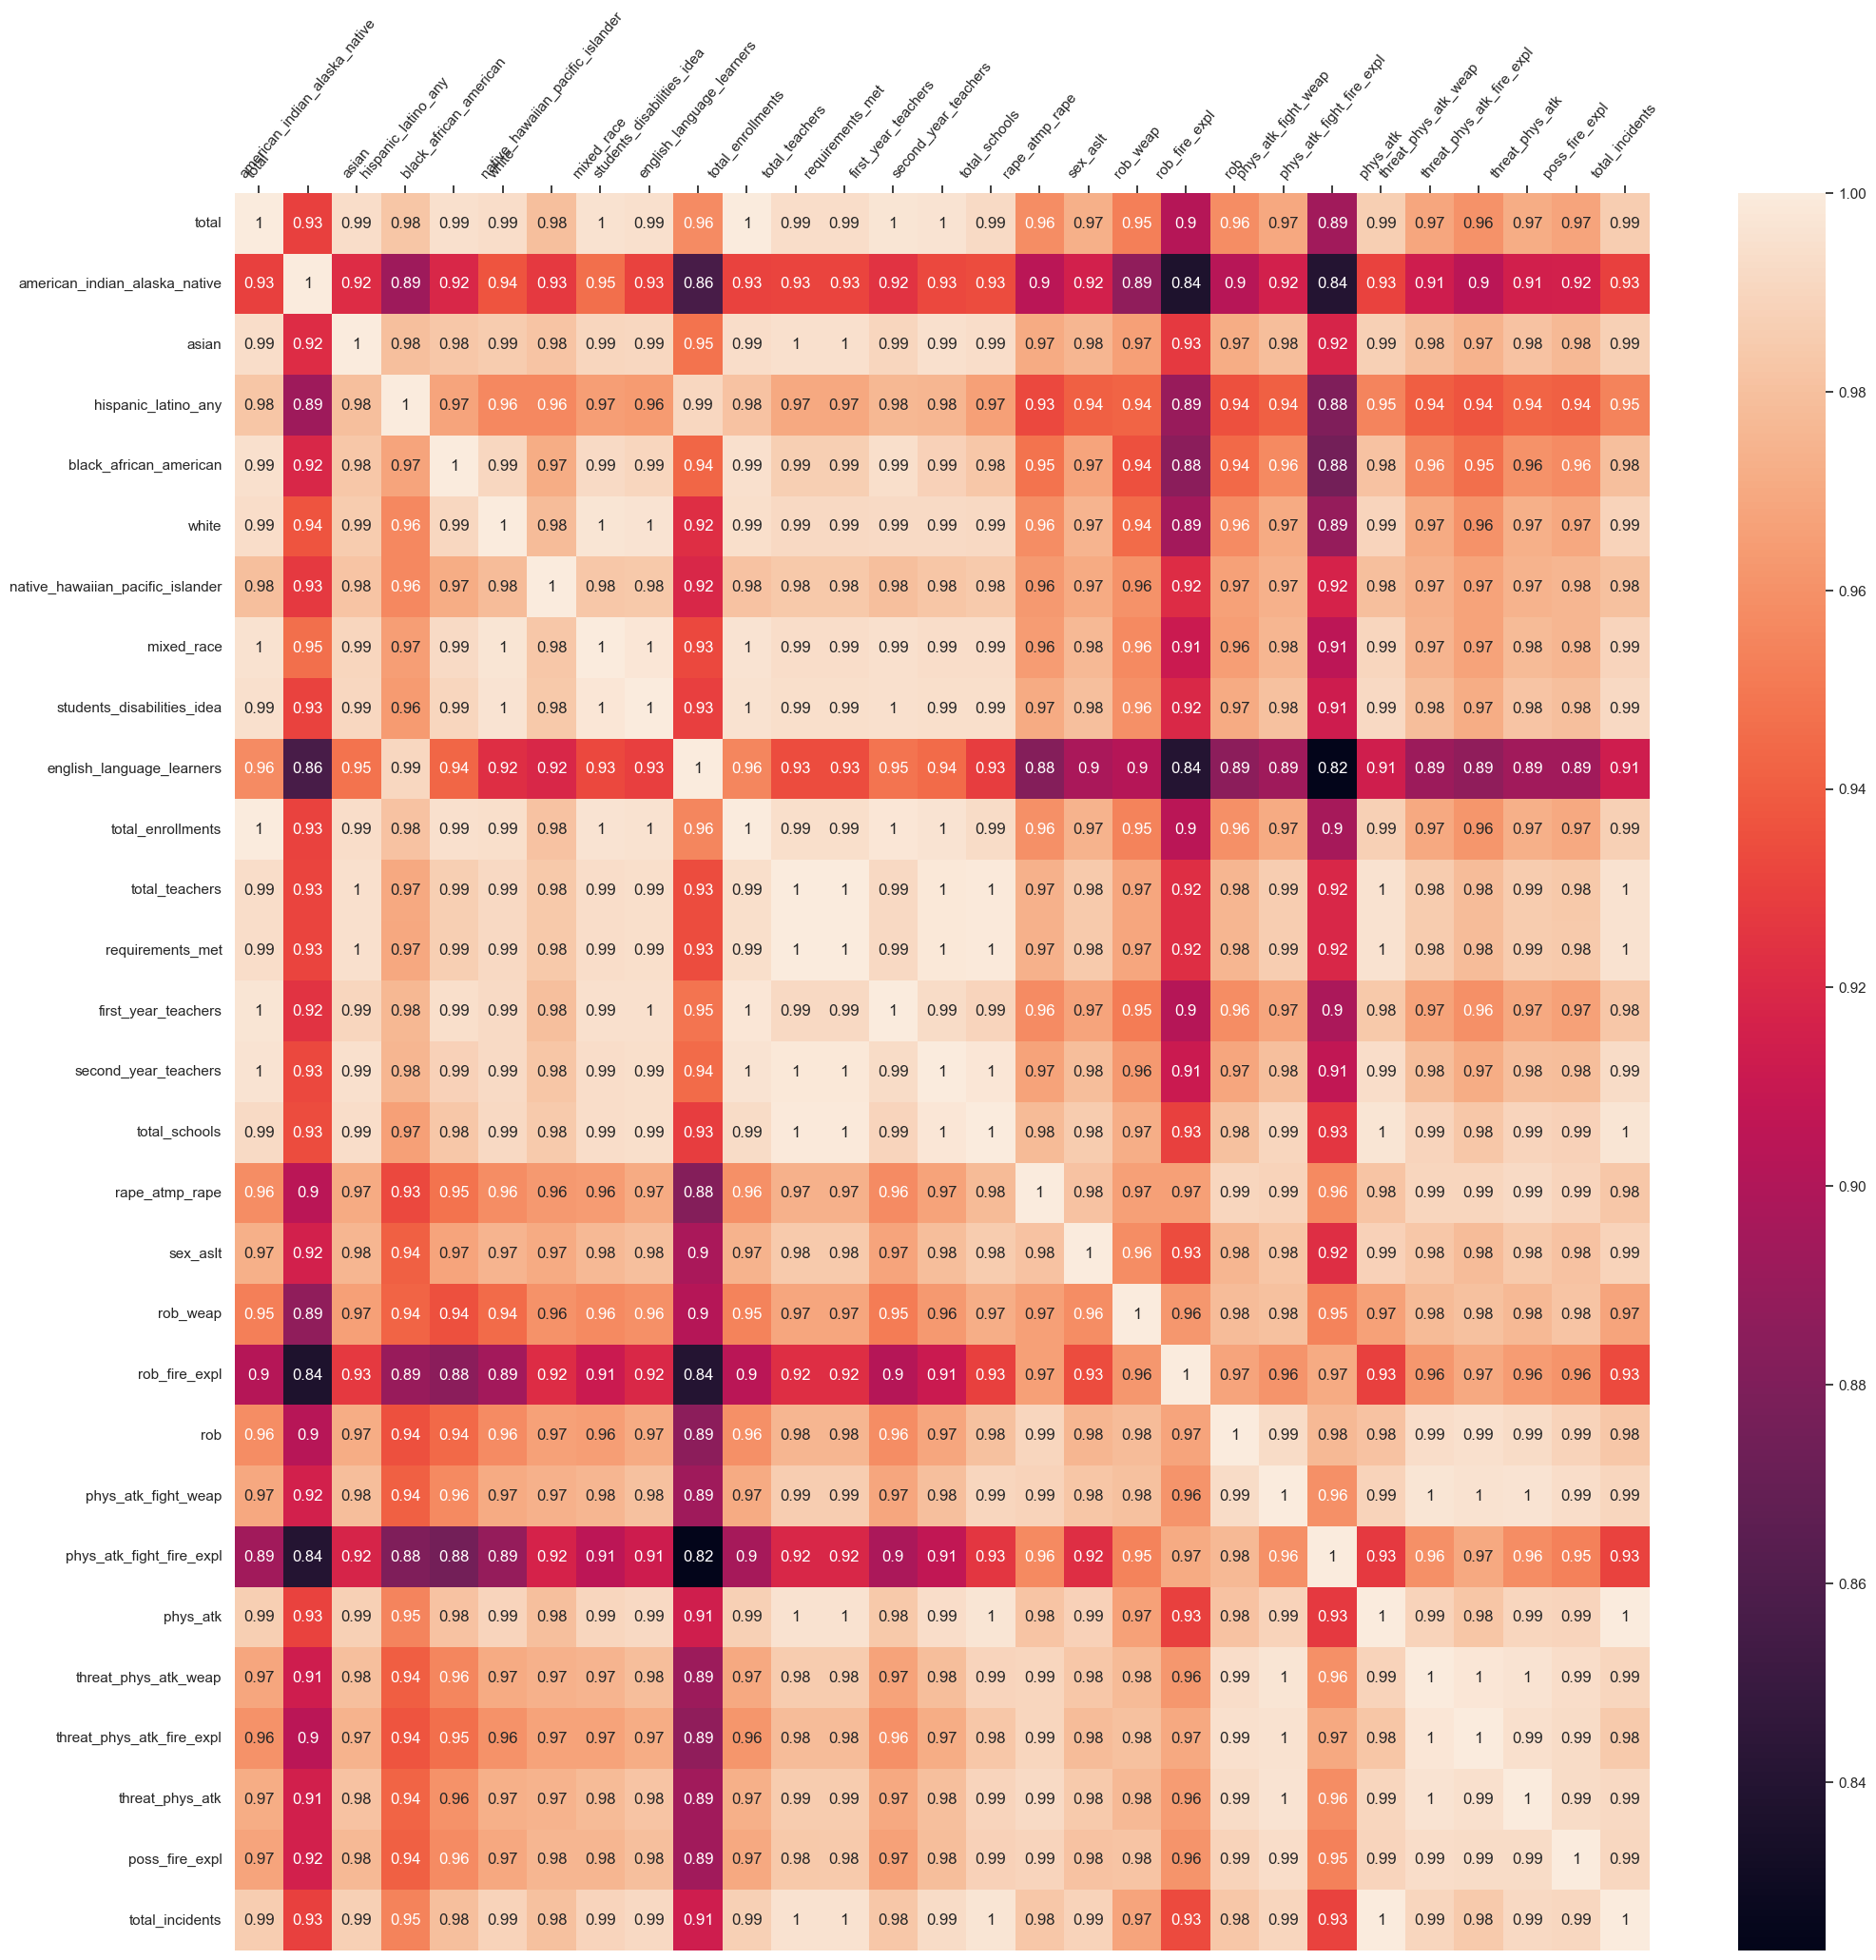

In [45]:
data = preschool.merge(teacher_creds, on="state").merge(incidents, on="state")
data.drop(['state', 'total_percent','black_african_american_p','asian_p', 'white_p','mixed_race_p','native_hawaiian_pacific_islander_p', 'american_indian_alaska_native_p', 'hispanic_latino_any_p', 'second_year_teachers_p', 'first_year_teachers_p', 'requirements_met_p', 'total_schools_p', 'students_disabilities_idea_p','english_language_learners_p'], axis=1, inplace=True)

plt.figure(figsize=(24, 24))
ax = sns.heatmap(data.corr(), annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=50)

In [46]:
# -- Drop other unessary data
teacher_creds.drop(["first_year_teachers", "first_year_teachers_p", "second_year_teachers", "second_year_teachers_p"], axis=1, inplace=True)
incidents.drop(incidents.columns.difference(['total_incidents', "state"]), axis=1, inplace=True)
preschool.drop(preschool.columns.difference(['total_enrollments', "state"]), axis=1, inplace=True)

# -- Merge all data on the State column
data = preschool.merge(teacher_creds, on="state").merge(incidents, on="state")

# -- Remove total of united states
data.drop([0], inplace=True) 

In [47]:
# -- Which state has the most the most number of schools. Choosing number here since most are 100%
most_schools = data[data["total_schools"] == data["total_schools"].max()]

# -- What"s the school with the highest rate of meeting requirements?
highest_requirements_met = data[data["requirements_met_p"] == data["requirements_met_p"].max()]

# -- Which state has the highets enrollment rate
highest_enrollment = data[data["total_enrollments"] == data["total_enrollments"].max()]

# -- Highest incidents
highest_incidents = data[data["total_incidents"] == data["total_incidents"].max()]

<Figure size 1600x1600 with 0 Axes>

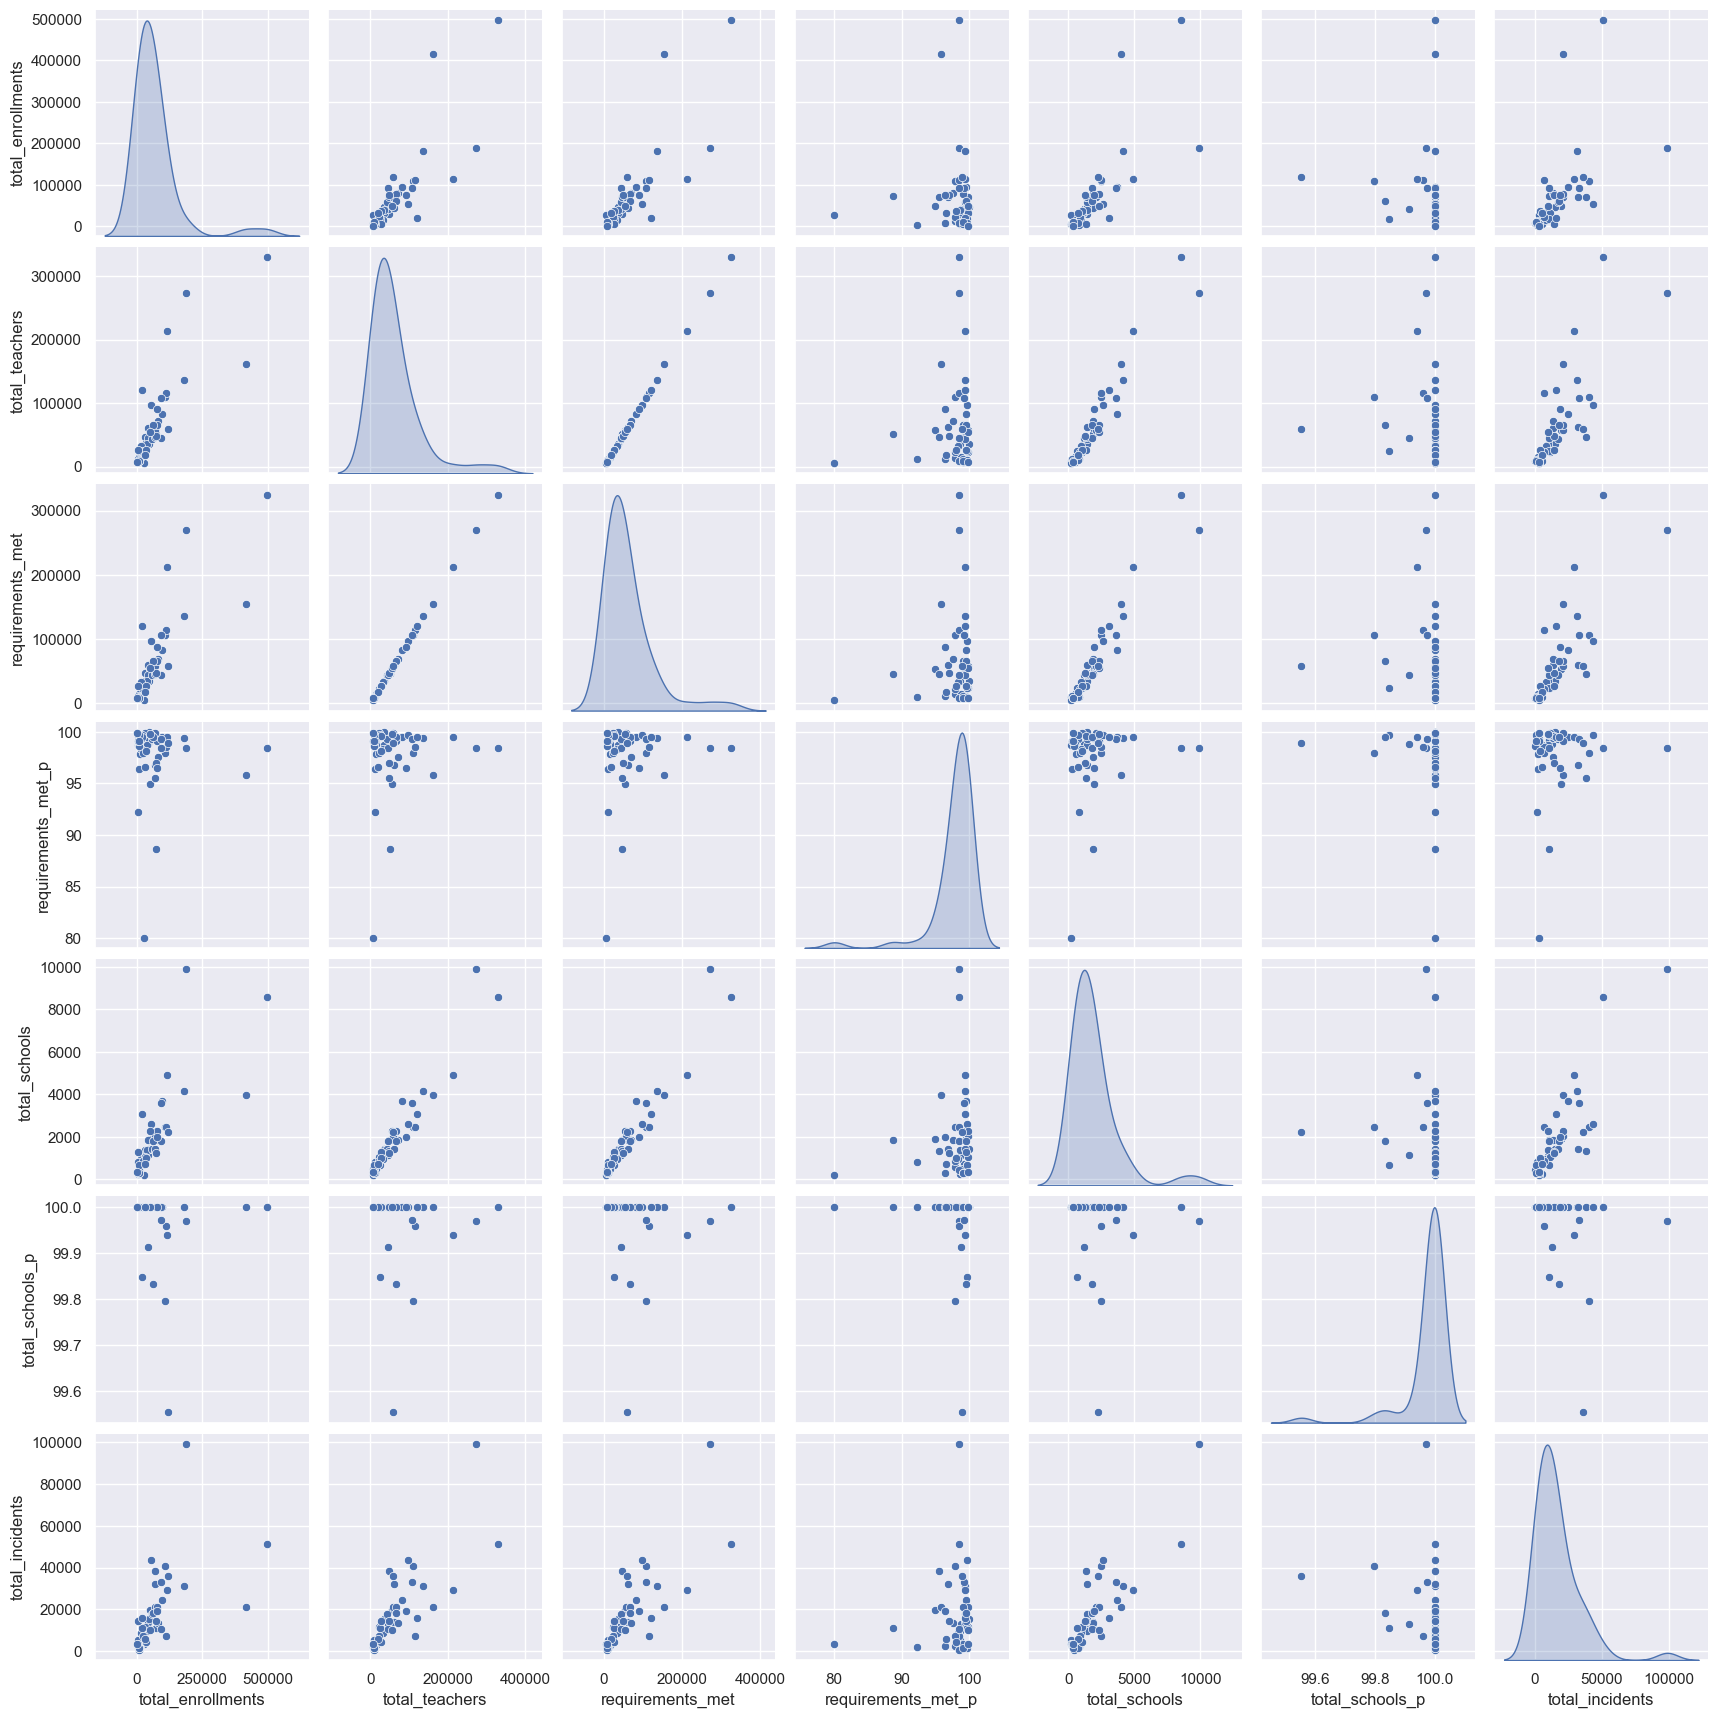

In [48]:
cols_to_plot = data.columns

plt.figure(figsize=(16, 16))
sns.pairplot(data[cols_to_plot], diag_kind="kde")
plt.savefig("../../data/data_pair_plot.png", dpi = 300, bbox_inches = 'tight')

In [49]:
data.head()

,state,total_enrollments,total_teachers,requirements_met,requirements_met_p,total_schools,total_schools_p,total_incidents
1,Alabama,30062.2285,47203.01,46839.32,99.2295,1397.0,100.00,10824.0
2,Alaska,7857.6259,7707.29,7639.21,99.1167,495.0,100.00,1799.0
3,Arizona,48657.5507,56969.03,54072.38,94.9154,1913.0,100.00,19490.0
4,Arkansas,31809.3943,34956.94,34450.44,98.5511,1085.0,100.00,9978.0
5,California,187290.6692,274148.82,270001.29,98.4871,9883.0,99.97,99106.0


In [50]:
def best_r_sq(values):
    deg = np.argmax([x["rsquared"] for x in values]) + 1
    return values[deg - 1]

In [51]:
r_sq_values = []

df = data.drop(["state"], axis=1)

for col in df.columns:
    if col != "total_enrollments":
        model = smf.ols(formula=f"total_enrollments ~ {col}", data=df).fit()
        r_sq_values.append({"feature": col, "rsquared": model.rsquared})

# -- Find the best polynomial degree
best_r_squared = best_r_sq(r_sq_values)

best_predictor = best_r_squared["feature"]
best_r_squared = best_r_squared["rsquared"]

In [52]:
# -- Initialize an empty list to store R^2 values
r_sq_values = []
degrees = 10
for n in range(1, degrees + 1):
    # -- Create the formula for the polynomial regression
    formula = f"total_enrollments ~ {best_predictor}" + "".join([f" + np.power({best_predictor}, {i})" for i in range(2, n + 1)])

    # -- Fit the model
    model_ = smf.ols(formula=formula, data=df).fit()

    # -- Store r_sq value
    r_sq_values.append({"feature": best_predictor, "rsquared": model_.rsquared, "deg": n })

best_r_squared = best_r_sq(r_sq_values)
print(best_r_squared)

{'feature': 'total_incidents', 'rsquared': np.float64(1.0), 'deg': 1}


In [53]:
df['schools_norm'] = df['total_schools']/df['total_schools'].mean()

r_sq_values = []
degrees = 20
for n in range(1, degrees + 1):
    # -- Create the formula for the polynomial regression
    formula = f"total_enrollments ~ {best_predictor}" + "".join([f" + np.power({best_predictor}, {i})" for i in range(2, n + 1)])

    # -- Fit the model
    model_ = smf.ols(formula=formula, data=df).fit()

    # -- Store r_sq value
    r_sq_values.append({"feature": best_predictor, "rsquared": model_.rsquared, "deg": n })


# -- Find the best polynomial degree
best_r_squared = best_r_sq(r_sq_values)
print('\nbest_r_squared:\n', best_r_squared)



best_r_squared:
 {'feature': 'total_incidents', 'rsquared': np.float64(1.0), 'deg': 1}


# Summary

The total number of incidents is predicted to be the best feature for determining preschool enrollment. This seems somewhat intuitive assuming this statistic would increase as total enrollment (population) would increase. Overall this turned out to be not very interesting or useful.

Further exploration might be to factor in College admissions of some kind to determine how successful the students were over their tenure in elementary-high school ages. 

This repositry for this project can be found at:
https://github.com/seantbaier/csca5622-final-project/blob/main/src/csca5622_final_project/final_project.ipynb 